In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [3]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3),
              filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [4]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [5]:
hist = cnn.fit(x_train, y_train, batch_size=128,
              epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 77s 193ms/step - loss: 1.6531 - accuracy: 0.4028 - val_loss: 1.2826 - val_accuracy: 0.5577
Epoch 2/30
391/391 [==============================] - 77s 196ms/step - loss: 1.3011 - accuracy: 0.5391 - val_loss: 1.0899 - val_accuracy: 0.6156
Epoch 3/30
391/391 [==============================] - 78s 198ms/step - loss: 1.1689 - accuracy: 0.5852 - val_loss: 1.0317 - val_accuracy: 0.6423
Epoch 4/30
391/391 [==============================] - 77s 196ms/step - loss: 1.0939 - accuracy: 0.6124 - val_loss: 0.9547 - val_accuracy: 0.6680
Epoch 5/30
391/391 [==============================] - 78s 199ms/step - loss: 1.0342 - accuracy: 0.6328 - val_loss: 0.9345 - val_accuracy: 0.6762
Epoch 6/30
391/391 [==============================] - 77s 198ms/step - loss: 0.9843 - accuracy: 0.6503 - val_loss: 0.9345 - val_accuracy: 0.6802
Epoch 7/30
391/391 [==============================] - 77s 198ms/step - loss: 0.9540 - accuracy: 0.6620 - val_loss: 0.8989 - val_ac

In [6]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9477 - accuracy: 0.7105


[0.9477494955062866, 0.7105000019073486]

In [7]:
predictions = cnn.predict(x_test)

In [8]:
predictions[0]

array([7.7774853e-04, 9.1588572e-06, 4.5451303e-05, 9.9389690e-01,
       1.0454073e-06, 2.7606220e-03, 9.6875522e-04, 1.3466795e-05,
       1.5168000e-03, 1.0070448e-05], dtype=float32)

In [9]:
np.argmax(predictions[2])

8

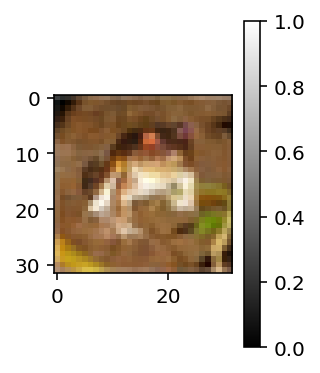

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 3))

plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.show()

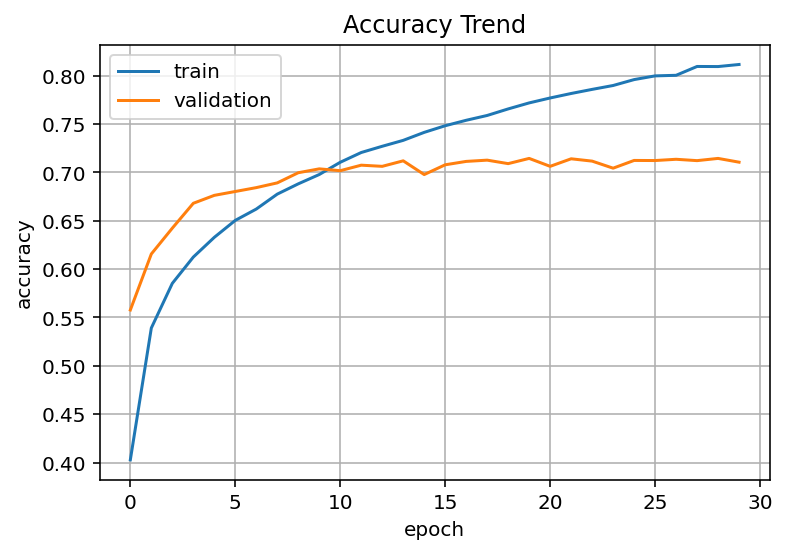

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

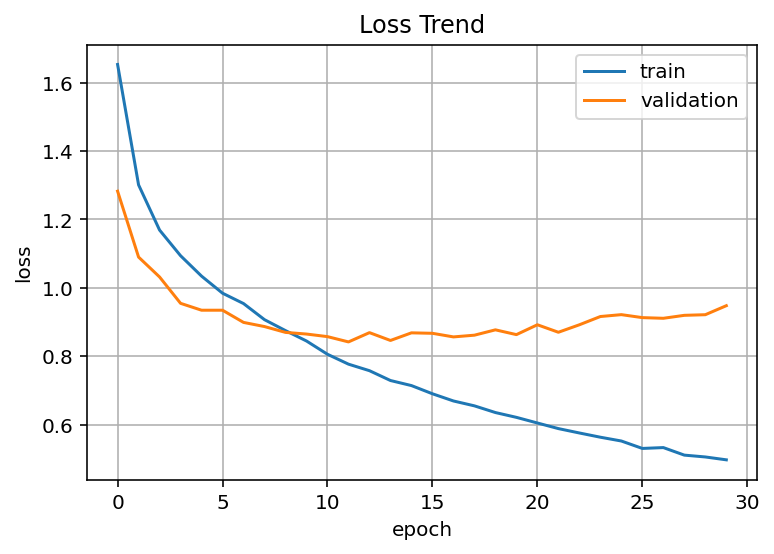

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

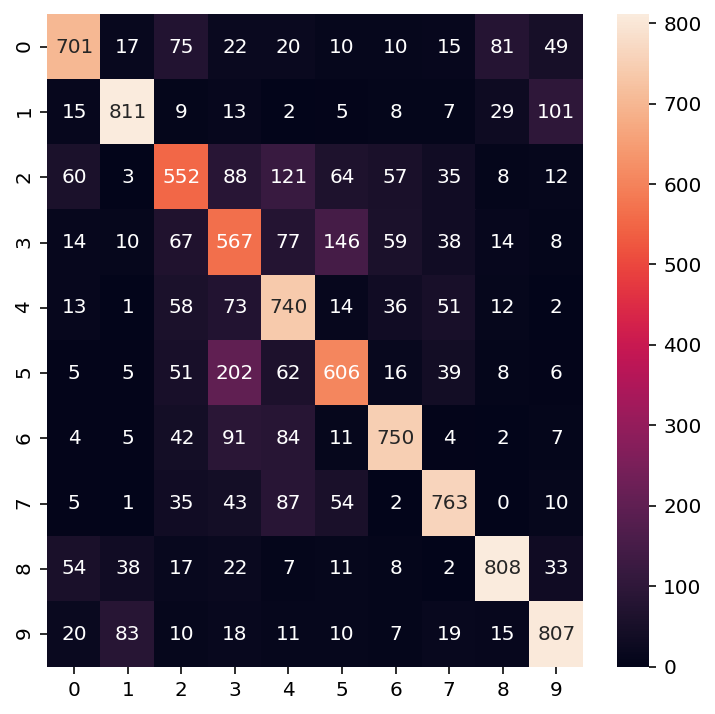

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value = cnn.predict(x_test)

cm = confusion_matrix(y_test,
                     np.argmax(predicted_value, axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()